# 1

## 1.1

### 1.1.1

<Figure size 432x288 with 0 Axes>

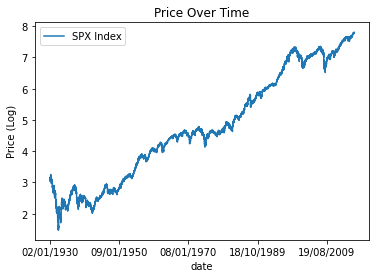

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

px = pd.read_csv("priceData.csv", index_col="date").dropna()
logpx = np.log(px)
plt.figure()
logpx.plot()
plt.ylabel("Price (Log)")
plt.title("Price Over Time")
plt.show()

### 1.1.2

<Figure size 432x288 with 0 Axes>

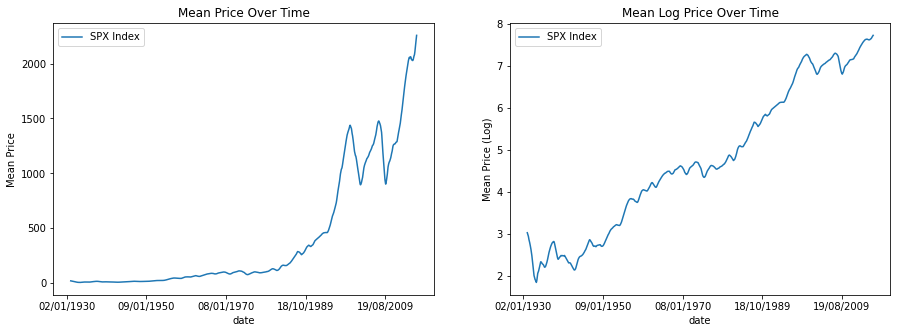

<Figure size 432x288 with 0 Axes>

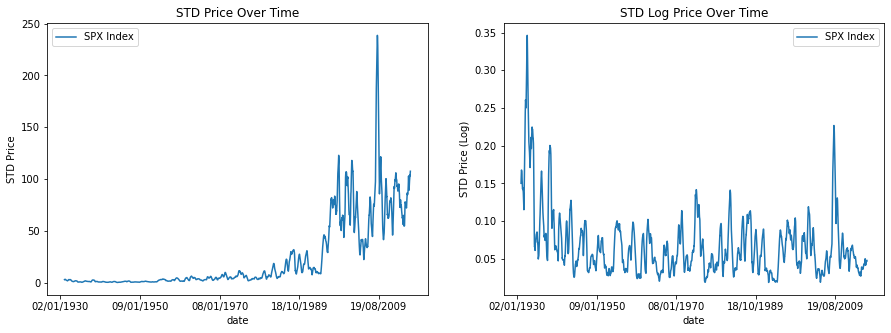

In [3]:
# 1.1.2
# sliding mean
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(15,5))
px.rolling(252).mean().plot(ax=axs[0])
logpx.rolling(252).mean().plot(ax=axs[1])
axs[0].set_ylabel('Mean Price')
axs[1].set_ylabel('Mean Price (Log)')
axs[0].title.set_text('Mean Price Over Time')
axs[1].title.set_text('Mean Log Price Over Time')
plt.show()

# sliding std
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(15,5))
px.rolling(252).std().plot(ax=axs[0])
logpx.rolling(252).std().plot(ax=axs[1])
axs[0].set_ylabel('STD Price')
axs[1].set_ylabel('STD Price (Log)')
axs[0].title.set_text('STD Price Over Time')
axs[1].title.set_text('STD Log Price Over Time')
plt.show()

### 1.1.3

<Figure size 432x288 with 0 Axes>

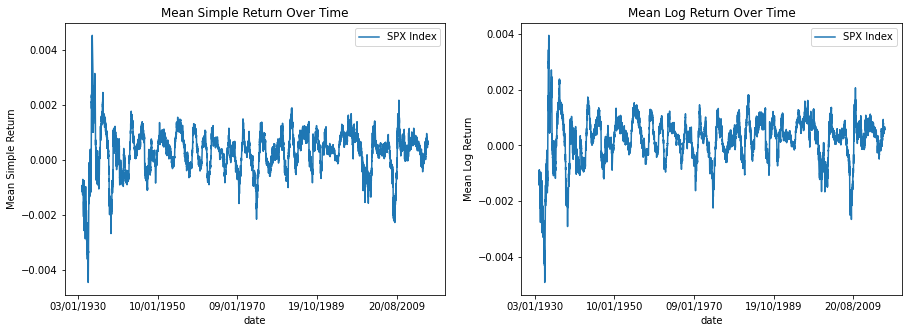

<Figure size 432x288 with 0 Axes>

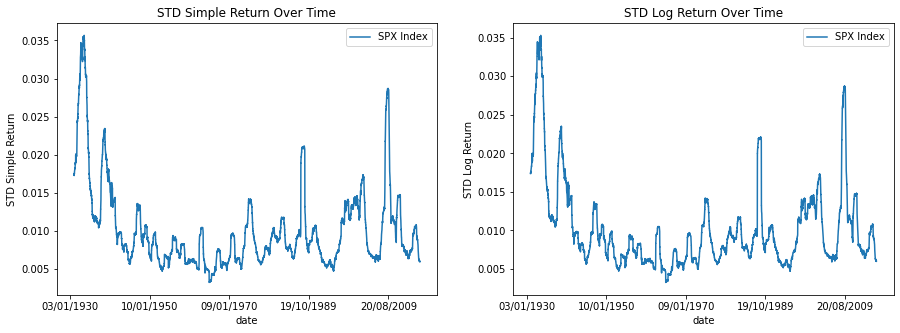

In [4]:
# log return
logret = logpx.diff().dropna()
# simple return
simpret = px.pct_change().dropna()

# sliding mean
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(15,5))
simpret.rolling(252).mean().plot(ax=axs[0])
logret.rolling(252).mean().plot(ax=axs[1])
axs[0].set_ylabel('Mean Simple Return')
axs[1].set_ylabel('Mean Log Return')
axs[0].title.set_text('Mean Simple Return Over Time')
axs[1].title.set_text('Mean Log Return Over Time')
plt.show()

# sliding std
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(15,5))
simpret.rolling(252).std().plot(ax=axs[0])
logret.rolling(252).std().plot(ax=axs[1])
axs[0].set_ylabel('STD Simple Return')
axs[1].set_ylabel('STD Log Return')
axs[0].title.set_text('STD Simple Return Over Time')
axs[1].title.set_text('STD Log Return Over Time')
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

test_px = adfuller(px)
test_logpx = adfuller(logpx)
test_simpret = adfuller(simpret)
test_logret = adfuller(logret)

for test in [test_px, test_logpx, test_simpret, test_logret]:
    print(test[1])

1.0
0.9863263713847651
0.0
0.0


### 1.1.4

In [6]:
from scipy import stats

# return the Jarque−Bera test p−value for a time−series x 
print(stats.jarque_bera(simpret)[1])
print(stats.jarque_bera(logret)[1])

0.0
0.0


## 1.2

### 1.2.1

<Figure size 432x288 with 0 Axes>

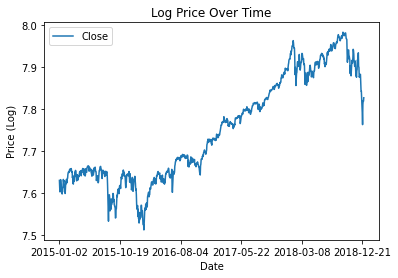

<Figure size 432x288 with 0 Axes>

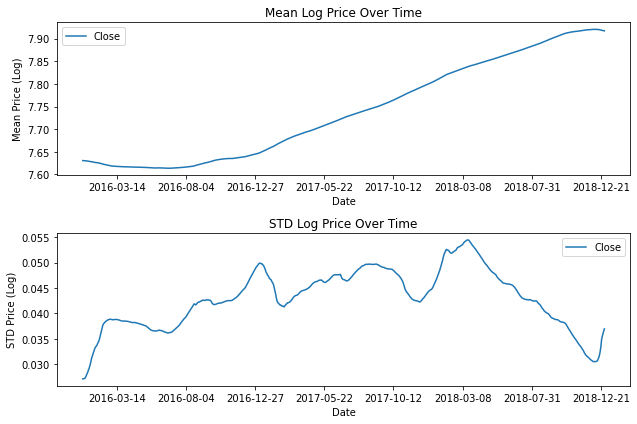

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA 
import copy

snp = pd.read_csv('snp_500_2015_2019.csv', index_col='Date')
snp_close = snp['Close'].to_frame().apply(np.log)

plt.figure()
snp_close.plot()
plt.ylabel("Price (Log)")
plt.title("Log Price Over Time")
plt.show()

plt.figure()
fig, axs = plt.subplots(2, 1, figsize=(9,6))
snp_close.rolling(252).mean().plot(ax=axs[0])
snp_close.rolling(252).std().plot(ax=axs[1])
axs[0].set_ylabel('Mean Price (Log)')
axs[1].set_ylabel('STD Price (Log)')
axs[0].title.set_text('Mean Log Price Over Time')
axs[1].title.set_text('STD Log Price Over Time')
fig.tight_layout()
plt.show()


### 1.2.2

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum

<Figure size 432x288 with 0 Axes>

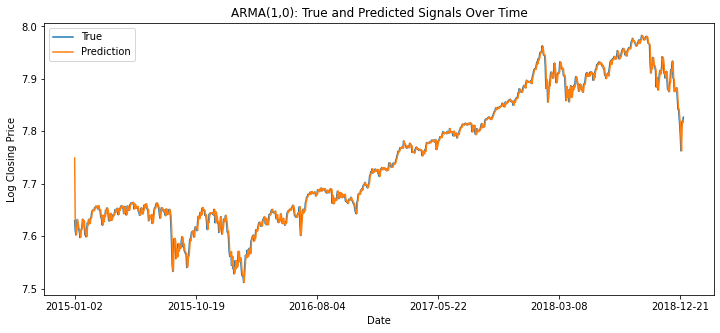

In [8]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
model = ARIMA(snp_arma, order=(1,0,0))
snp_arma['Res'] = model.fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

plt.figure()
ax = snp_arma.plot(y='True')
snp_arma.plot(figsize=(12,5), y='Prediction', ax=ax)
# axs[0].set_ylabel('Mean Simple Return')
ax.set_ylabel('Log Closing Price')
plt.title("ARMA(1,0): True and Predicted Signals Over Time")
plt.show()


In [9]:
print('Model Parameters:', ARIMA(snp_arma['True'].values, order=(1,1,0)).fit().arparams)
print("Mean Absolute Residual Error:", np.mean(abs(snp_arma['Res'])))

Model Parameters: [-0.00816978]
Mean Absolute Residual Error: 0.00598200561569962


### 1.2.3

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 432x288 with 0 Axes>

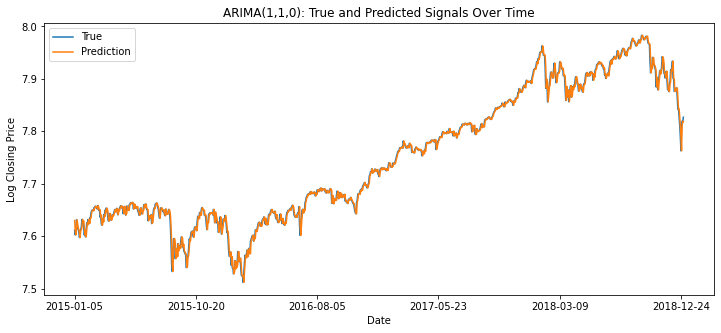

In [10]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
model = ARIMA(snp_arma, order=(1,1,0))
snp_arma['Res'] = model.fit().resid 
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

plt.figure()
ax = snp_arma[1:].plot(y='True')
snp_arma[1:].plot(figsize=(12,5), y='Prediction', ax=ax)
# axs[0].set_ylabel('Mean Simple Return')
ax.set_ylabel('Log Closing Price')
plt.title("ARIMA(1,1,0): True and Predicted Signals Over Time")
plt.show()

In [11]:
print('Model Parameters:', ARIMA(snp_arma['True'].values, order=(1,1,0)).fit().arparams)
print("Mean Absolute Residual Error:", np.mean(abs(snp_arma['Res'])))

Model Parameters: [-0.00816978]
Mean Absolute Residual Error: 0.013433086345304697


## 1.3

### 1.3.4

[0.72609393 0.72609393 1.00635964 0.86051894 0.91144512]
[ -9.58986784  -4.9929334   -1.761553     3.49725481 -18.10484143]
CAG   -11.057272
MAR    -7.044244
LIN    -3.742431
HCP     0.333031
MAT    -3.378334
Name: 2018-12-31, dtype: float64
[ -9.58986784  -4.9929334   -1.761553     3.49725481 -18.10484143]
[ -9.46199642  -3.96829106  -0.20372553   6.0372657  -24.80503355]
[-10.03613964  -3.51272122   0.96250015   7.9926682  -26.87121761]
[-10.91185023  -3.34069014   1.79514264   9.45275542 -26.51049142]
[-11.85228624  -3.28368701   2.36006667  10.52197089 -25.09367099]
[-12.72951579  -3.24996449   2.72041009  11.30059563 -23.42062264]
[-13.48507464  -3.19598978   2.9313364   11.87529956 -21.91556954]
[-14.10242631  -3.10684299   3.03810196  12.31577095 -20.76638973]
[-14.58839098  -2.98323123   3.07605305  12.67483831 -20.02078394]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


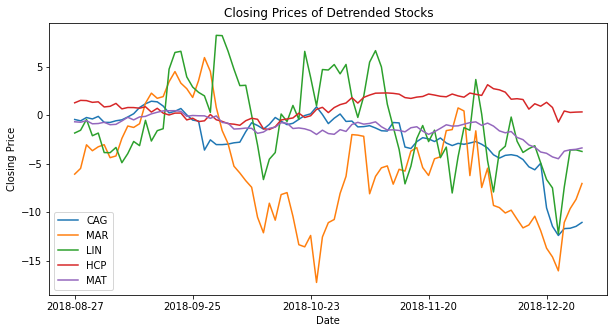

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.tsa.api import VAR
df = pd.read_csv(r'snp_allstocks_2015_2019.csv', index_col='Date') 
info = pd.read_csv(r'snp_info.csv') 
info.drop(columns=info.columns[0], inplace=True)

tickers = ['CAG' , 'MAR' , 'LIN' , 'HCP' , 'MAT'] 
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66).mean() 
stocks_detrended = stocks.sub(stocks_ma).dropna()

stocks_detrended.plot(figsize=(10,5), title="Closing Prices of Detrended Stocks", ylabel="Closing Price")

model = VAR(stocks_detrended) 
results = model.fit(1)
A_Mat = results.params[1:].values 
eigA, _ = np.linalg.eig(A_Mat)
print(abs(eigA))

print(np.matmul(A_Mat,stocks_detrended.iloc[-1]))

curr = stocks_detrended.iloc[-1]

for i in range(10):
    next = np.matmul(A_Mat, curr)
    print(curr)
    curr = next


### 1.3.5

In [13]:
eig_analysis = pd.DataFrame(columns=["Min", "Max"], index=info['GICS Sector'].unique())

for sector in info['GICS Sector'].unique():
    tickers = info.loc[info['GICS Sector']==sector]['Symbol'].tolist() 
    stocks = df[tickers]
    stocks_ma = stocks.rolling(window=66).mean() 
    stocks_detrended = stocks.sub(stocks_ma).dropna()
    model = VAR(stocks_detrended) 
    results = model.fit(1)
    A_Mat = results.params[1:].values 
    eigA, _ = np.linalg.eig(A_Mat)
    eig_analysis.at[sector, "Min"] = abs(np.min(eigA))
    eig_analysis.at[sector, "Max"] = abs(np.max(eigA))

display(eig_analysis)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A dat

,Min,Max
Industrials,0.371246,0.991721
Health Care,0.383165,0.994153
Information Technology,0.374081,0.992738
Communication Services,0.752488,0.982263
Consumer Discretionary,0.447563,0.99065
Utilities,0.399328,0.985648
Financials,0.453489,1.00434
Materials,0.284215,0.991744
Real Estate,0.763563,0.982785
Consumer Staples,0.546458,0.991508


# 2

## 2.4

In [14]:
import pandas as pd
df = pd.read_csv(r'fsp_case_31_BSD.csv',index_col=0,header=[0,1])

### 2.4.1

6.094780982187594e-05
0.0002556038139074304


<AxesSubplot:title={'center':'Average Market Returns Over Time'}, xlabel='Date', ylabel='Average Return'>

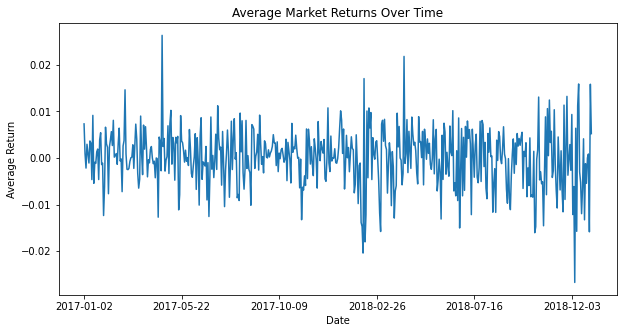

In [15]:
returns = df['ret'].fillna(0)
# market = returns.stack().dropna()
market = returns.mean(axis=1)
R_mt = returns.stack().mean()
Var_mt = returns.stack().var()
print(R_mt)
print(Var_mt)
market.plot(figsize=(10,5), xlabel="Date", ylabel="Average Return", title="Average Market Returns Over Time")


### 2.4.2

<AxesSubplot:title={'center':'Variation of Beta For All Stocks'}, xlabel='Date', ylabel='Beta'>

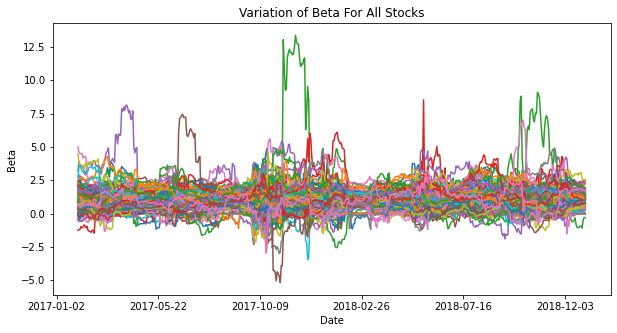

In [16]:
beta_data = {}

for asset in returns:
    beta_data[asset] = returns[asset].rolling(22).cov(market, pairwise=True) / market.rolling(22).var()


beta_frame = pd.DataFrame(beta_data)
beta_frame.plot(figsize=(10,5), legend=False, title="Variation of Beta For All Stocks", xlabel="Date", ylabel="Beta")

In [17]:
print("Mean:", beta_frame.dropna().stack().mean())
print("STD:", beta_frame.dropna().stack().std())

Mean: 1.0000000000000004
STD: 0.7742683593768952


### 2.4.3

<AxesSubplot:title={'center':'Cap-Weighted Market Return Over Time'}, xlabel='Time', ylabel='Average Market Return'>

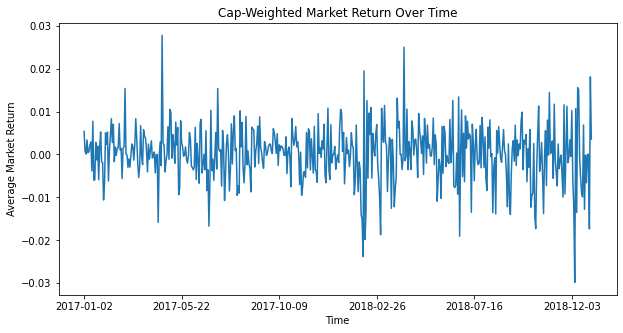

In [18]:
mcap = df['mcap'].fillna(1)

mcap_per_day = mcap.sum(axis=1)
mcap_ret_per_day = returns.multiply(mcap)
weighted_R = mcap_ret_per_day.divide(mcap_per_day, axis=0)

weighted_R.sum(axis=1).plot(figsize=(10,5), title="Cap-Weighted Market Return Over Time", xlabel="Time", ylabel="Average Market Return")



### 2.4.4

<AxesSubplot:title={'center':'Variation of Cap-Weighted Beta For All Stocks'}, xlabel='Date', ylabel='Beta'>

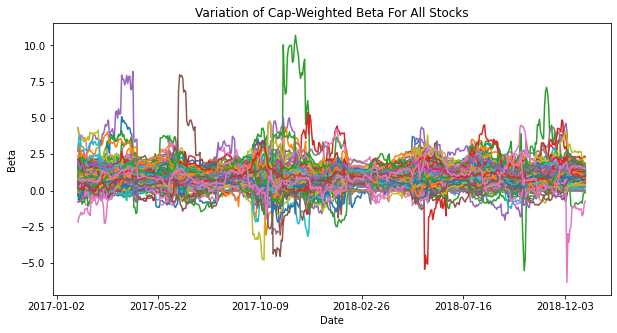

In [19]:
beta_m_data = {}

cap_m_market = weighted_R.sum(axis=1)

for asset in returns:
    beta_m_data[asset] = returns[asset].rolling(22).cov(cap_m_market, pairwise=True) / cap_m_market.rolling(22).var()


beta_m_frame = pd.DataFrame(beta_m_data)

beta_m_frame.plot(figsize=(10,5), legend=False, title="Variation of Cap-Weighted Beta For All Stocks", xlabel="Date", ylabel="Beta")

In [20]:
print("Mean:", beta_m_frame.dropna().stack().mean())
print("STD:", beta_m_frame.dropna().stack().std())

Mean: 0.9066039347393474
STD: 0.716243753622727


### 2.4.5

In [21]:
import numpy as np

b_m = beta_m_frame.dropna()


b_s = np.log(mcap).loc[b_m.index]

r = returns.loc[b_m.index]


# res_t = np.empty((500,3,1))
res_t = {}
errs = {}
# errs = np.empty((500, len(r.iloc[0])))

for t in b_s.index:
    b_m_t = b_m.loc[t]
    b_s_t = b_s.loc[t]
    ones = np.ones(len(b_m_t))
    b_x = pd.DataFrame([ones, b_m_t, b_s_t]).transpose()
    m1 = b_x.transpose().dot(b_x)
    m2 = b_x.transpose().dot(r.loc[t].values.reshape((-1,1)))
    # print(m2)
    res = np.linalg.pinv(m1).dot(m2)
    res_t[t] = res.squeeze()

    est_val = b_x.dot(res)
    errs[t] = r.loc[t]-np.array(est_val).squeeze()

res_t = pd.DataFrame(res_t).transpose()
res_t.columns = ["a", "R_m", "R_s"]


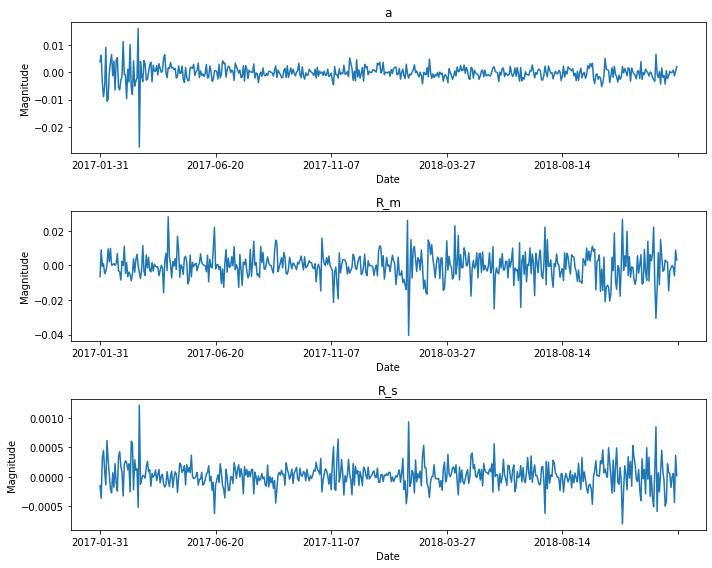

In [22]:
import matplotlib.pyplot as plt


a = res_t["a"]
r_m = res_t["R_m"]
r_s = res_t["R_s"]


fig, axs = plt.subplots(3,1, figsize=(10,8))
a.plot(ax=axs[0])
r_m.plot(ax=axs[1])
r_s.plot(ax=axs[2])
axs[0].set_title("a")
axs[1].set_title("R_m")
axs[2].set_title("R_s")
for ax in axs:
    ax.set_xlabel("Date")
    ax.set_ylabel("Magnitude")
plt.tight_layout()

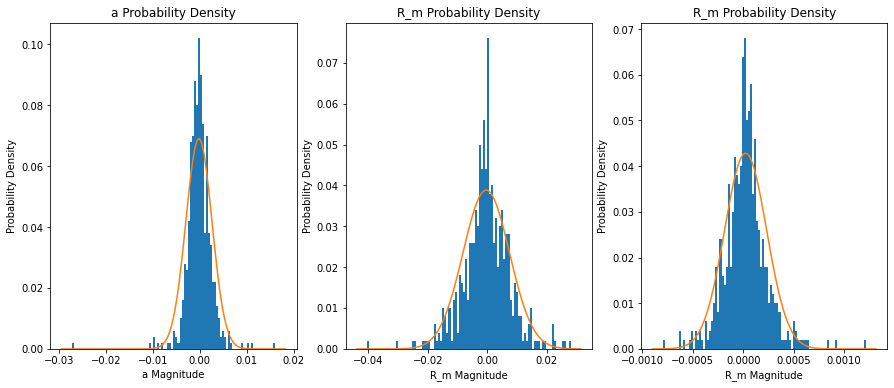

In [23]:
import scipy.stats as stats

fig, axs = plt.subplots(1,3, figsize=(15,6))


data_a = a.values.reshape(-1)
weights_a = np.ones_like(data_a)/float(len(data_a))
(mu, std) = stats.norm.fit(data_a)
axs[0].hist(data_a, bins = 100, weights = weights_a)
low, high = axs[0].get_xlim()
interval = np.linspace(low, high, 100)
normal_dist = stats.norm.pdf(interval, mu, std)
normal_dist = normal_dist / sum(normal_dist)
axs[0].plot(interval, normal_dist)
axs[0].set_xlabel('a Magnitude')
axs[0].set_ylabel('Probability Density')
axs[0].set_title('a Probability Density')

data_r_m = r_m.values.reshape(-1)
weights_r_m = np.ones_like(data_r_m)/float(len(data_r_m))
(mu, std) = stats.norm.fit(data_r_m)
axs[1].hist(data_r_m, bins = 100, weights = weights_r_m)
low, high =  axs[1].get_xlim()
interval = np.linspace(low, high, 100)
normal_dist = stats.norm.pdf(interval, mu, std)
normal_dist = normal_dist / sum(normal_dist)
axs[1].plot(interval, normal_dist)
axs[1].set_xlabel('R_m Magnitude')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('R_m Probability Density')

data_r_s = r_s.values.reshape(-1)
weights_r_s = np.ones_like(data_r_s)/float(len(data_r_s))
(mu, std) = stats.norm.fit(data_r_s)
axs[2].hist(data_r_s, bins = 100, weights = weights_r_s)
low, high =  axs[2].get_xlim()
interval = np.linspace(low, high, 100)
normal_dist = stats.norm.pdf(interval, mu, std)
normal_dist = normal_dist / sum(normal_dist)
axs[2].plot(interval, normal_dist)
axs[2].set_xlabel('R_m Magnitude')
axs[2].set_ylabel('Probability Density')
axs[2].set_title('R_m Probability Density')
fig.subplots_adjust(hspace=0.4)

### 2.4.5c 

Text(0.5, 1.0, 'Specific Return Correlation Density')

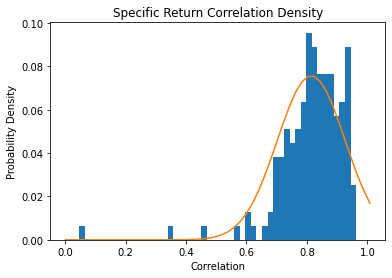

In [24]:

errs = pd.DataFrame(errs).transpose()


comp_ret_corr = {}

for asset in errs:
    comp_ret_corr[asset] = errs[asset].corr(r[asset])


comp_ret_corr = pd.DataFrame(comp_ret_corr, index=[0])

data = comp_ret_corr.values.reshape(-1)
weights = np.ones_like(data)/float(len(data))
(mu, std) = stats.norm.fit(data)
plt.figure()
plt.hist(data, bins = 50, weights = weights)
low, high =  plt.xlim()
interval = np.linspace(low, high, 50)
normal_dist = stats.norm.pdf(interval, mu, std)
normal_dist = normal_dist / sum(normal_dist)
plt.plot(interval, normal_dist)
plt.xlabel('Correlation')
plt.ylabel('Probability Density')
plt.title('Specific Return Correlation Density')

### 2.4.5d

<AxesSubplot:title={'center':'Covariance of Rm and Rs Over Time'}, xlabel='Date', ylabel='Covariance'>

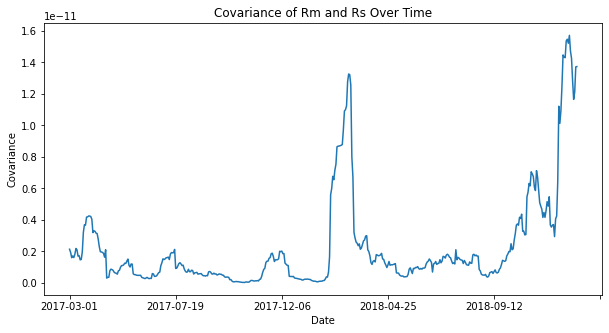

In [25]:
R_Mat = pd.DataFrame({"R_m": r_m, "R_s": r_s})

r_cov_mat = R_Mat.rolling(22).cov().dropna()

r_cov_data = {}

for date in r_cov_mat.index:
    r_cov_data[date[0]] = np.linalg.det(r_cov_mat.loc[date[0]])

r_cov_data = pd.DataFrame(r_cov_data, index=[0]).transpose()
r_cov_data.plot(figsize=(10,5), legend=False, xlabel="Date", ylabel="Covariance", title="Covariance of Rm and Rs Over Time")

### 2.4.5e

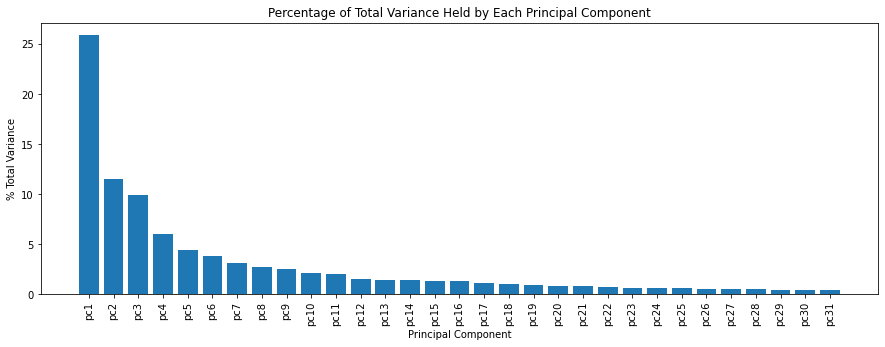

In [26]:
from sklearn.decomposition import PCA

err_cov = errs.cov()

pca_comps = len(err_cov)//5

pc_labels = [f"pc{i+1}" for i in range(pca_comps)]

pca = PCA(n_components=pca_comps)
pca.fit(err_cov)

err_cov_dim_red = pd.DataFrame(pca.components_).transpose()
err_cov_dim_red.columns = pc_labels

plt.figure(figsize=(15,5))
plt.bar(pc_labels, pca.explained_variance_ratio_*100)
plt.xticks(rotation="vertical")
plt.xlabel("Principal Component")
plt.ylabel("% Total Variance")
plt.title("Percentage of Total Variance Held by Each Principal Component")
plt.show()

In [27]:
print(pca.explained_variance_ratio_[:3].sum())

0.4729280629658072


# 3

### 3.1.2

,Mean Return,Theoretical Variance,Observed Variance
Weighting,,,
Even,0.000546,6.103506756528139e-05,0.000061
Min Variance,0.000647,5.592534448790345e-05,0.000056


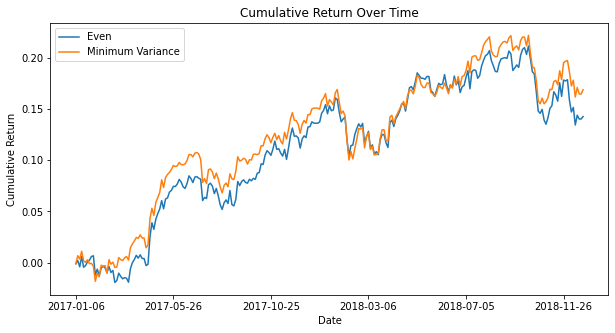

In [28]:
from sklearn.model_selection import train_test_split as tts
from IPython.display import display

ret_samp_stocks = returns.columns[-10:]
ret_samp = returns[ret_samp_stocks]

train_data, test_data = tts(ret_samp, test_size=0.5)

train_data = train_data.sort_index()
test_data = test_data.sort_index()

sigma = train_data.cov()
e_vec = np.ones((len(sigma), 1))

w_num = np.matmul(np.linalg.inv(sigma), e_vec)
w_denom = np.matmul(e_vec.T, w_num)

min_var_weights = np.divide(w_num, w_denom).T
even_weights = np.divide(np.ones((len(sigma), 1)), len(sigma)).T

test_data_even = test_data.multiply(even_weights).sum(axis=1)
test_data_min_var = test_data.multiply(min_var_weights).sum(axis=1)

mean_ret_even = test_data_even.mean(axis=0)
mean_ret_min_var = test_data_min_var.mean(axis=0)

cum_ret_even = test_data_even.cumsum(axis=0)
cum_ret_min_var = test_data_min_var.cumsum(axis=0)

cum_ret_both = pd.DataFrame({"Even": cum_ret_even, "Minimum Variance": cum_ret_min_var})

cum_ret_both.plot(figsize=(10,5), xlabel="Date", ylabel="Cumulative Return", title="Cumulative Return Over Time")

even_weights_var_1 = np.matmul(test_data.cov(), even_weights.T)
even_weights_var = np.matmul(even_weights, even_weights_var_1)

opt_weights_var_1 = np.matmul(test_data.cov(), min_var_weights.T)
opt_weights_var = np.matmul(min_var_weights, opt_weights_var_1)

even_ac_var = test_data_even.var()
opt_ac_var = test_data_min_var.var()

portfolio_comp = pd.DataFrame({"Mean Return": [mean_ret_even, mean_ret_min_var], "Theoretical Variance": [even_weights_var.values.squeeze(), opt_weights_var.values.squeeze()], "Observed Variance":[even_ac_var, opt_ac_var]})
portfolio_comp.index = ["Even", "Min Variance"]
portfolio_comp.index.name = "Weighting"
# print(portfolio_comp)

display(portfolio_comp)

### 3.1.3

In [29]:
def rets_to_cov_tensor(returns, window_length):
    tensor = np.empty((len(returns.columns), len(returns.columns), window_length))
    for i in range(len(returns)):
        ret = returns.iloc[i].values.reshape(10,1)
        cov_ret = ret.dot(ret.transpose())
        tensor[:,:,i] = cov_ret
    return tensor

In [30]:
def portfolio_optimiser(cov_mat):
    e_vec = np.ones((len(cov_mat), 1))

    w_num = np.matmul(np.linalg.inv(cov_mat), e_vec)
    w_denom = np.matmul(e_vec.T, w_num)

    return np.divide(w_num, w_denom).T

In [31]:
def calc_recursive_weights(list_of_returns, window_length, t):
    tau = t - window_length + 1
    local_slice = list_of_returns[tau:t+1]
    mu = pd.DataFrame(1/window_length * local_slice.sum(axis=0)).transpose()
    rets_for_cov = local_slice.subtract(mu.values.squeeze(), axis=1)
    cov_tensor = rets_to_cov_tensor(rets_for_cov, window_length)
    c = 1/window_length * cov_tensor.sum(axis=2)
    w = portfolio_optimiser(c).squeeze()
    return w

,Mean Return,Theoretical Variance,Observed Variance
Weighting,,,
Even,0.000546,6.103506756528139e-05,0.000061
Min Variance,0.000647,5.592534448790345e-05,0.000056
Recursive,0.000063,-1,0.000014


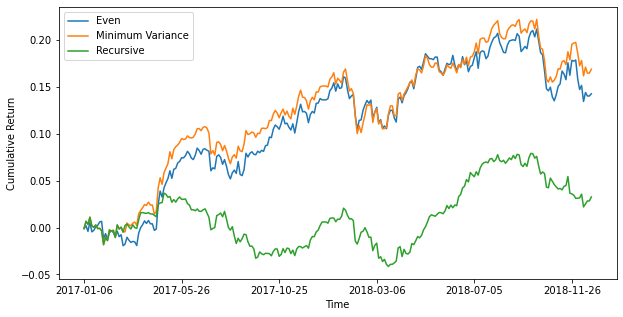

In [32]:
window_length = 22

all_rec_weights = {}

for i in range(len(test_data)):

    weights = min_var_weights

    if i >= window_length - 1:
        weights = calc_recursive_weights(test_data, window_length, i).reshape(1,10)
    
    all_rec_weights[test_data.index[i]] = weights.squeeze()

all_rec_weights = pd.DataFrame(all_rec_weights).transpose()
all_rec_weights.columns = ret_samp.columns


rec_ret = ret_samp.multiply(all_rec_weights).sum(axis=1)

cum_ret_rec = rec_ret.cumsum(axis=0)

cum_ret_all = pd.DataFrame({"Even": cum_ret_even, "Minimum Variance": cum_ret_min_var, "Recursive": cum_ret_rec[cum_ret_even.index]})

cum_ret_all.plot(figsize=(10,5), xlabel="Time", ylabel="Cumulative Return")


mean_rec_ret = rec_ret.mean(axis=0)
var_rec_ret = rec_ret.var()

portfolio_comp_all = pd.DataFrame({"Mean Return": [mean_ret_even, mean_ret_min_var, mean_rec_ret], "Theoretical Variance": [even_weights_var.values.squeeze(), opt_weights_var.values.squeeze(), -1], "Observed Variance":[even_ac_var, opt_ac_var, var_rec_ret]})
portfolio_comp_all.index = ["Even", "Min Variance", "Recursive"]
portfolio_comp_all.index.name = "Weighting"

display(portfolio_comp_all)


# 4

## 4.1

### 4.1.1

In [44]:
# Stocks
AAPL_data = pd.read_csv(r'AAPL.csv', index_col="Date").fillna(0)
IBM_data = pd.read_csv(r'IBM.csv', index_col="Date").fillna(0)
JPM_data = pd.read_csv(r'JPM.csv', index_col="Date").fillna(0)

# Dow Jones Index
DJI_data = pd.read_csv(r'DJI.csv', index_col="Date").fillna(0)


# Append Returns Column

# AAPL_data["Return"] = AAPL_data["Adj Close"].subtract(AAPL_data["Open"]).divide(AAPL_data["Open"])
# IBM_data["Return"] = IBM_data["Adj Close"].subtract(IBM_data["Open"]).divide(IBM_data["Open"])
# JPM_data["Return"] = JPM_data["Adj Close"].subtract(JPM_data["Open"]).divide(JPM_data["Open"])
# DJI_data["Return"] = DJI_data["Adj Close"].subtract(DJI_data["Open"]).divide(DJI_data["Open"])

AAPL_data["Return"] = AAPL_data['Adj Close'].pct_change()
IBM_data["Return"] = IBM_data['Adj Close'].pct_change()
JPM_data["Return"] = JPM_data['Adj Close'].pct_change()
DJI_data["Return"] = DJI_data['Adj Close'].pct_change()

total_stock_dict = {"AAPL":AAPL_data.copy(), "IBM":IBM_data.copy(), "JPM":JPM_data.copy()}

def gen_desc_stats(data):
    stats = {}
    for col in data:
        col_mean = data[col].mean()
        col_med = data[col].median()
        col_std = data[col].std()
        stats[col] = [col_mean, col_med, col_std]
    return pd.DataFrame(stats, index=["Mean", "Median", "STD"])


for name, stock in total_stock_dict.items():
    stat_list = gen_desc_stats(stock)
    stat_list.index.name = name
    display(stat_list)

,Open,High,Low,Close,Adj Close,Volume,Return
AAPL,,,,,,,
Mean,187.686694,189.561753,185.823705,187.711953,186.174273,3.270475e+07,0.000426
Median,186.289993,187.399994,184.940002,186.119995,184.351776,2.918400e+07,0.001611
STD,22.145621,22.281577,22.008797,22.160721,21.904664,1.417972e+07,0.019323


,Open,High,Low,Close,Adj Close,Volume,Return
IBM,,,,,,,
Mean,138.454382,139.492072,137.329243,138.363108,134.902751,5.198937e+06,-0.000252
Median,142.809998,143.990005,142.059998,142.710007,138.566391,4.237900e+06,0.000409
STD,12.114308,11.913079,12.204633,12.028123,10.671648,3.328956e+06,0.015562


,Open,High,Low,Close,Adj Close,Volume,Return
JPM,,,,,,,
Mean,108.707689,109.652072,107.682988,108.606574,107.262590,1.470069e+07,-0.000133
Median,109.180000,110.529999,107.790001,109.019997,107.219269,1.363300e+07,-0.000603
STD,5.359081,5.202870,5.432537,5.300480,4.833316,5.349771e+06,0.013088


### 4.1.2

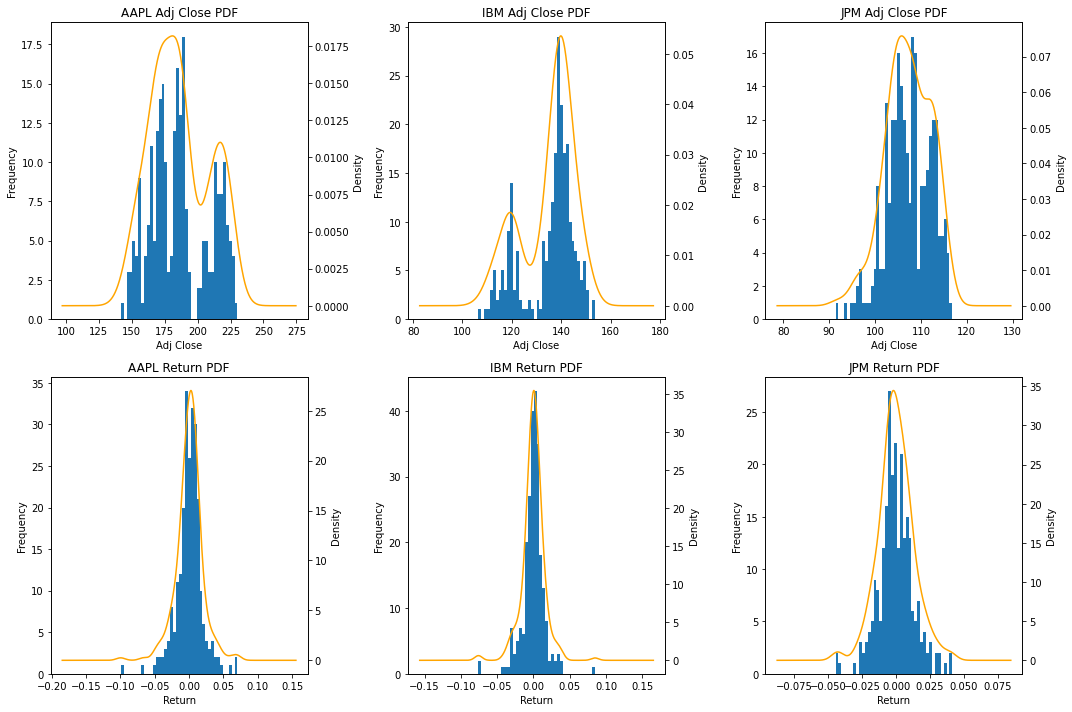

In [37]:
def gen_pdf_ret_adj(stock, name, loc):

    data_ret = stock["Return"]
    data_adj = stock["Adj Close"]

    data_adj.plot.hist(ax=axs[0][loc], bins=40)
    data_adj.plot.kde(ax=axs[0][loc].twinx(), color="orange")
    axs[0][loc].set_xlabel('Adj Close')
    axs[0][loc].set_title(f'{name} Adj Close PDF')

    data_ret.plot.hist(ax=axs[1][loc], bins=40)
    data_ret.plot.kde(ax=axs[1][loc].twinx(), color="orange")
    axs[1][loc].set_xlabel('Return')
    axs[1][loc].set_title(f'{name} Return PDF')

fig, axs = plt.subplots(2,3, figsize=(15,10))
loc = 0
for i,stk in total_stock_dict.items():
    gen_pdf_ret_adj(stk, i, loc)
    loc += 1
fig.tight_layout()


### 4.1.3

In [54]:
def roll_mad(data, axis=0):
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

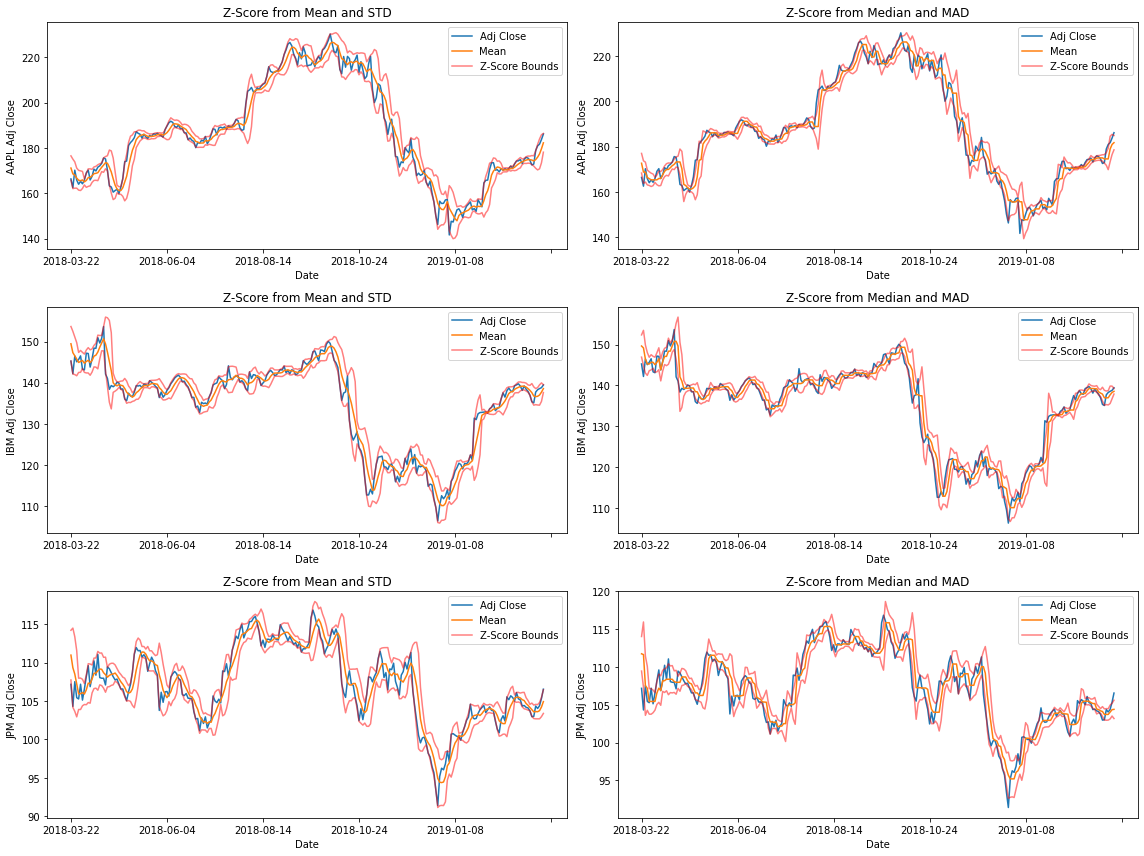

In [55]:
def stock_rm_sd(stock, name, loc):
    close_data = stock["Adj Close"]
    r_mean = close_data.rolling(5).mean().dropna()
    upper_std = r_mean + 1.5 * close_data.rolling(5).std().dropna()
    lower_std = r_mean - 1.5 * close_data.rolling(5).std().dropna()
    close_data[r_mean.index].plot(ax=loc)
    r_mean.plot(ax=loc)
    upper_std.plot(ax=loc, color="red", alpha=0.5)
    lower_std.plot(ax=loc, color="red", alpha=0.5)
    loc.legend(["Adj Close", "Mean", "Z-Score Bounds"])
    loc.set_ylabel(f"{name} Adj Close")
    loc.set_title("Z-Score from Mean and STD")

def stock_rm_mad(stock, name, loc):
    close_data = stock["Adj Close"]
    r_med = close_data.rolling(5).median().dropna()
    upper_std = r_med + 1.5 * close_data.rolling(5).apply(roll_mad).dropna()
    lower_std = r_med - 1.5 * close_data.rolling(5).apply(roll_mad).dropna()
    close_data[r_med.index].plot(ax=loc)
    r_med.plot(ax=loc)
    upper_std.plot(ax=loc, color="red", alpha=0.5)
    lower_std.plot(ax=loc, color="red", alpha=0.5)
    loc.legend(["Adj Close", "Mean", "Z-Score Bounds"])
    loc.set_ylabel(f"{name} Adj Close")
    loc.set_title("Z-Score from Median and MAD")

fig, axs = plt.subplots(3,2,figsize=(16, 12))
loc = 0
for name, stock in total_stock_dict.items():
    stock_rm_sd(stock, name, axs[loc][0])
    stock_rm_mad(stock, name, axs[loc][1])
    loc += 1
fig.tight_layout()


### 4.1.4

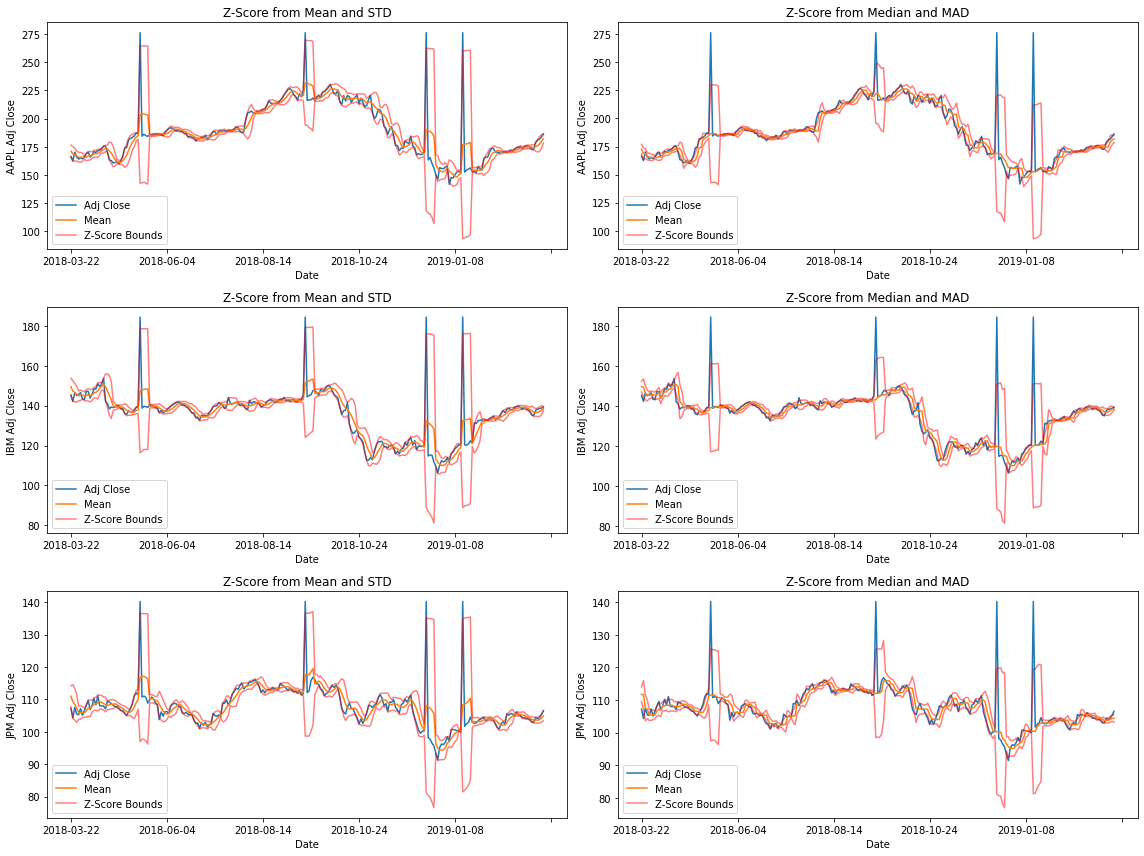

In [56]:
AAPL_data_outlier = AAPL_data.copy()
IBM_data_outlier = IBM_data.copy()
JPM_data_outlier = JPM_data.copy()

total_stock_dict_modified = {"AAPL": AAPL_data_outlier, "IBM": IBM_data_outlier, "JPM": JPM_data_outlier}

outlier_pts = ["2018-05-14", "2018-09-14", "2018-12-14", "2019-01-14"]

for stock in total_stock_dict_modified.values():
    stock.at[outlier_pts, "Adj Close"] = 1.2 * stock["Adj Close"].max()


fig, axs = plt.subplots(3,2,figsize=(16, 12))
loc = 0
for name, stock in total_stock_dict_modified.items():
    stock_rm_sd(stock, name, axs[loc][0])
    stock_rm_mad(stock, name, axs[loc][1])
    loc += 1
fig.tight_layout()

### 4.1.5

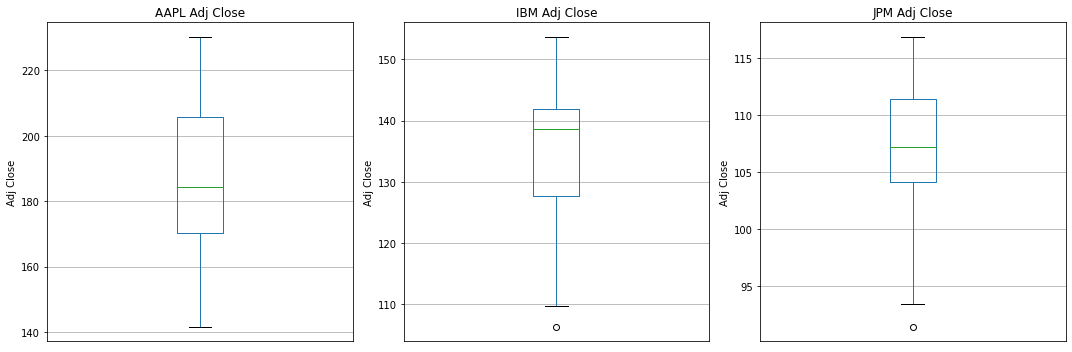

In [57]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

loc = 0
for name, stock in total_stock_dict.items():
    pd.DataFrame(stock["Adj Close"]).boxplot(ax=ax[loc])
    ax[loc].set_title(f"{name} Adj Close")
    ax[loc].set_ylabel("Adj Close")
    ax[loc].set_xticks([])
    loc += 1
fig.tight_layout()

## 4.2

### 4.2.1

In [58]:
import math

def get_median(series):
    series = series.sort_values(ignore_index=True)
    
    mid_index = (len(series) + 1) / 2 - 1
    up_index = math.ceil(mid_index)
    dn_index = math.floor(mid_index)

    return (series[up_index] + series[dn_index]) / 2

def get_iqr(series):
    series = series.sort_values(ignore_index=True)
    q1_index = (len(series) + 1) * 1 / 4 - 1
    q1_up_index = math.ceil(q1_index)
    q1_dn_index = math.floor(q1_index)

    q2_index = (len(series) + 1) * 3 / 4 - 1
    q2_up_index = math.ceil(q2_index)
    q2_dn_index = math.floor(q2_index)

    q1 = (series[q1_up_index] + series[q1_dn_index]) / 2
    q2 = (series[q2_up_index] + series[q2_dn_index]) / 2

    return q2 - q1

def get_mad(series):
    return get_median(abs(series - get_median(series)))

In [59]:
# Initialising the comparison dataframe
accuracy_comp = pd.DataFrame(columns = ['Library Median', 'Self Median', 
                                         'Library IQR', 'Self IQR', 'Library MAD', 'Self MAD'], index = total_stock_dict.keys())

# Calculating key stats using mine and given functions
for name, stock in total_stock_dict.items():
    meds_lib = []
    meds_self = []

    iqr_lib = []
    iqr_self = []

    mad_lib = []
    mad_self = []

    for col in stock:
        series = stock[col]
        meds_lib.append(series.median())
        meds_self.append(get_median(series))

        iqr_lib.append(stats.iqr(series))
        iqr_self.append(get_iqr(series))

        mad_lib.append(stats.median_abs_deviation(series))
        mad_self.append(get_mad(series))
        

    accuracy_comp.loc[name] = [np.mean(meds_lib), np.mean(meds_self), np.mean(iqr_lib), np.mean(iqr_self), np.mean(mad_lib), np.mean(mad_self)]


display(accuracy_comp)


,Library Median,Self Median,Library IQR,Self IQR,Library MAD,Self MAD
AAPL,4169275.586196,4169275.586202,NaN,2355397.396247,NaN,1081996.977887
IBM,605515.73383,605515.733835,NaN,282711.189908,NaN,131532.214316
JPM,1947649.105523,1947649.105541,NaN,897563.263456,NaN,433631.546759


In [60]:
import time

series_data = AAPL_data['Adj Close']

n_iter = 10000

time_comp = pd.DataFrame(columns=["Library", "Self"], index=["Median", "IQR", "MAD"])

t0 = time.time()
for _ in range(n_iter):
    series.median()
t1 = time.time()
time_comp.at["Median", "Library"] = (t1-t0) / n_iter

t0 = time.time()
for _ in range(n_iter):
    get_median(series)
t1 = time.time()
time_comp.at["Median", "Self"] = (t1-t0) / n_iter

t0 = time.time()
for _ in range(n_iter):
    stats.iqr(series)
t1 = time.time()
time_comp.at["IQR", "Library"] = (t1-t0) / n_iter

t0 = time.time()
for _ in range(n_iter):
    get_iqr(series)
t1 = time.time()
time_comp.at["IQR", "Self"] = (t1-t0) / n_iter

t0 = time.time()
for _ in range(n_iter):
    stats.median_abs_deviation(series)
t1 = time.time()
time_comp.at["MAD", "Library"] = (t1-t0) / n_iter

t0 = time.time()
for _ in range(n_iter):
    get_mad(series)
t1 = time.time()
time_comp.at["MAD", "Self"] = (t1-t0) / n_iter

display(time_comp)
    

,Library,Self
Median,0.000157,0.00018
IQR,0.000305,0.000224
MAD,0.000089,0.000576


In [61]:
# find breakdown

series_data = AAPL_data['Adj Close'].copy()

true_med_self = get_median(series_data)
true_med_lib = series_data.median()

true_iqr_self = get_iqr(series_data)
true_iqr_lib = stats.iqr(series_data)

true_mad_self = get_mad(series_data)
true_mad_lib = stats.median_abs_deviation(series_data)

BP_comp = pd.DataFrame(columns=["Library", "Self"], index=["Median", "IQR", "MAD"])

def find_breakdown(series_data, estimator, truth, thresh):
    for i in range(1, len(series_data/2) + 1):
        series_data[i] = series_data.max() * 1.2
        med = estimator(series_data)
        if med/truth - 1 >= thresh:
            return (i-1) / len(series_data)

    return 0.5

def find_breakdown_med_lib(series_data, truth, thresh):
    for i in range(1, len(series_data/2) + 1):
        series_data[i] = series_data.max() * 1.2
        med = series_data.median()
        if med/truth - 1 >= thresh:
            return (i-1) / len(series_data)

    return 0.5

threshold = 0.3

BP_comp.at["Median", "Library"] = find_breakdown_med_lib(AAPL_data['Adj Close'].copy(), true_med_lib, threshold)

BP_comp.at["Median", "Self"] = find_breakdown(AAPL_data['Adj Close'].copy(), get_median, true_med_self, threshold)

BP_comp.at["IQR", "Library"] = find_breakdown(AAPL_data['Adj Close'].copy(), stats.iqr, true_iqr_lib, threshold)

BP_comp.at["IQR", "Self"] = find_breakdown(AAPL_data['Adj Close'].copy(), get_iqr, true_iqr_self, threshold)

BP_comp.at["MAD", "Library"] = find_breakdown(AAPL_data['Adj Close'].copy(), stats.median_abs_deviation, true_mad_lib, threshold)

BP_comp.at["MAD", "Self"] = find_breakdown(AAPL_data['Adj Close'].copy(), get_mad, true_mad_self, threshold)

display(BP_comp)

,Library,Self
Median,0.498008,0.498008
IQR,0.179283,0.179283
MAD,0.135458,0.135458


## 4.3

### 4.3.1

AAPL = 1.3255798439118753 * DJI + 0.00016466014991461887
IBM = 0.960092455130406 * DJI + -0.00044057249463597874
JPM = 0.9314081813095039 * DJI + -0.00031633075928958745


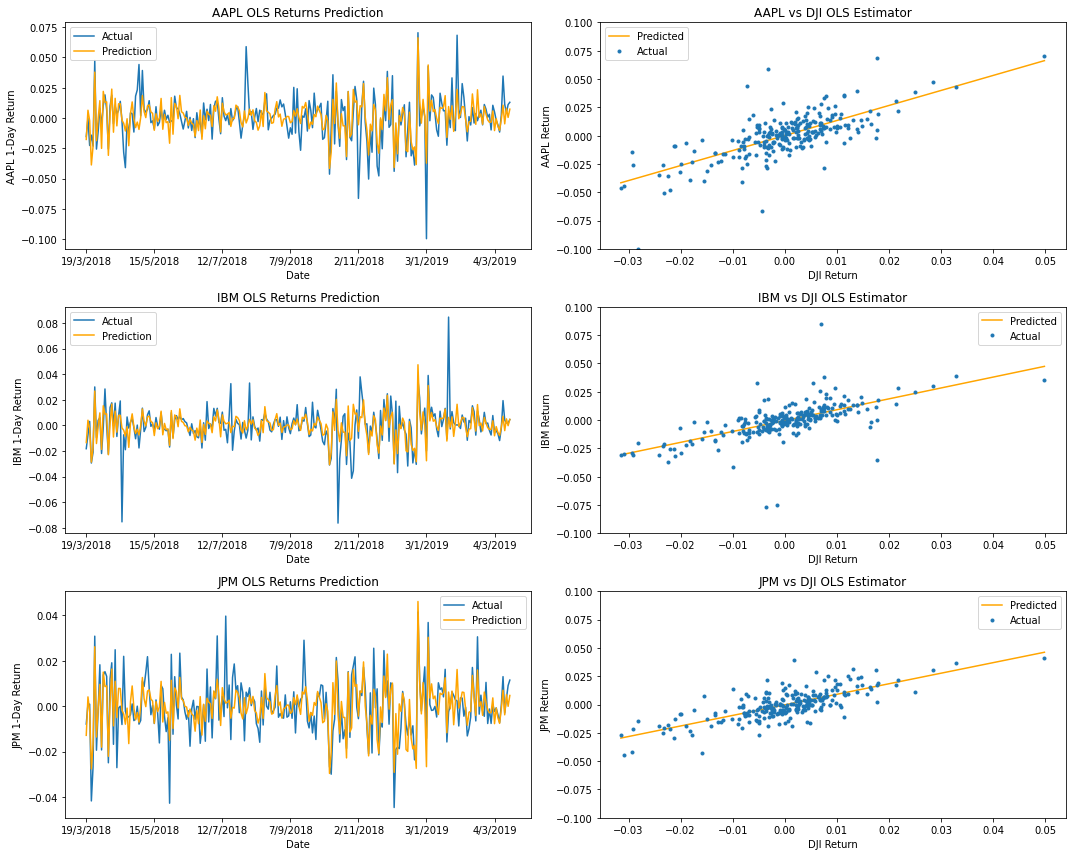

In [62]:
from sklearn.linear_model import LinearRegression

index_ret = DJI_data["Return"].values.reshape(-1,1)[1:]
x_axis = np.linspace(index_ret.min(), index_ret.max())

fig, axs = plt.subplots(3, 2, figsize = (15, 12)) 
loc = 0
for name, stock in total_stock_dict.items():
    stock_ret = stock["Return"].values.reshape(-1,1)[1:]
    reg_stk = LinearRegression().fit(index_ret, stock_ret)
    prediction = reg_stk.predict(index_ret)
    line_best_fit = reg_stk.coef_.squeeze() * x_axis + reg_stk.intercept_.squeeze()
    print(f"{name} = {reg_stk.coef_.squeeze()} * DJI + {reg_stk.intercept_.squeeze()}")

    axs[loc][0].plot(DJI_data.index[1:], stock_ret, label = 'Actual')
    axs[loc][0].plot(DJI_data.index[1:], prediction, label = 'Prediction', color = 'orange')
    axs[loc][0].set_title(f"{name} OLS Returns Prediction")
    axs[loc][0].set_xlabel("Date")
    axs[loc][0].set_xticks(DJI_data.index[1::40])
    axs[loc][0].set_ylabel(f"{name} 1-Day Return")
    axs[loc][0].legend()

    axs[loc][1].plot(x_axis, line_best_fit, color = 'orange', label = 'Predicted')
    axs[loc][1].plot(index_ret, stock_ret, '.', label = 'Actual')
    axs[loc][1].set_xlabel('DJI Return')
    axs[loc][1].set_ylabel(f'{name} Return')
    axs[loc][1].set_title(f'{name} vs DJI OLS Estimator')
    axs[loc][1].set_ylim(-0.1,0.1)
    axs[loc][1].legend()

    loc += 1

fig.tight_layout()


### 4.3.2

AAPL = 1.2702124338484595 * DJI + -0.00013037063872889347
IBM = 0.9735620716222264 * DJI + -0.0005094349585579208
JPM = 0.9196620629000358 * DJI + -0.0008009614327494722


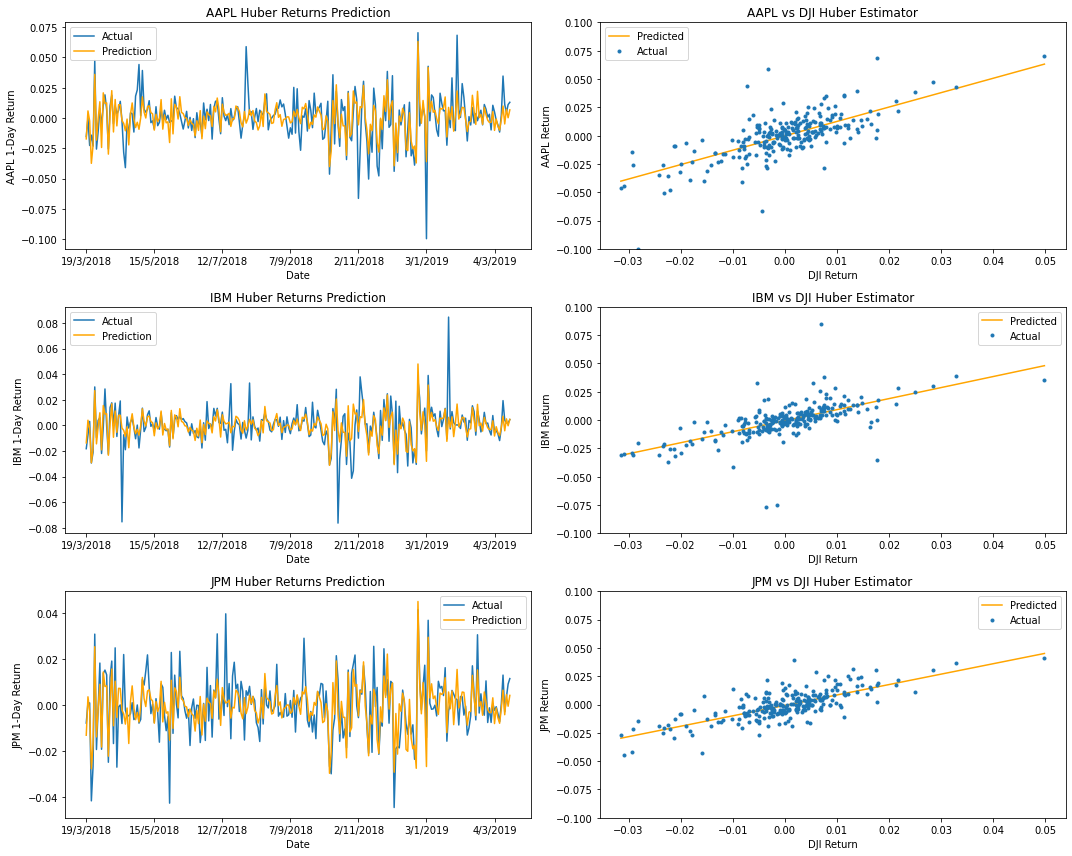

In [63]:
from sklearn.linear_model import HuberRegressor

index_ret = DJI_data["Return"].values.reshape(-1,1)[1:]
x_axis = np.linspace(index_ret.min(), index_ret.max())

fig, axs = plt.subplots(3, 2, figsize = (15, 12)) 
loc = 0
for name, stock in total_stock_dict.items():
    stock_ret = stock["Return"].values.reshape(-1,1)[1:]
    hub = HuberRegressor().fit(index_ret, stock_ret.ravel())
    prediction = hub.predict(index_ret)
    line_best_fit = hub.coef_.squeeze() * x_axis + hub.intercept_.squeeze()
    print(f"{name} = {hub.coef_.squeeze()} * DJI + {hub.intercept_.squeeze()}")

    axs[loc][0].plot(DJI_data.index[1:], stock_ret, label = 'Actual')
    axs[loc][0].plot(DJI_data.index[1:], prediction, label = 'Prediction', color = 'orange')
    axs[loc][0].set_title(f"{name} Huber Returns Prediction")
    axs[loc][0].set_xlabel("Date")
    axs[loc][0].set_xticks(DJI_data.index[1::40])
    axs[loc][0].set_ylabel(f"{name} 1-Day Return")
    axs[loc][0].legend()

    axs[loc][1].plot(x_axis, line_best_fit, color = 'orange', label = 'Predicted')
    axs[loc][1].plot(index_ret, stock_ret, '.', label = 'Actual')
    axs[loc][1].set_xlabel('DJI Return')
    axs[loc][1].set_ylabel(f'{name} Return')
    axs[loc][1].set_title(f'{name} vs DJI Huber Estimator')
    axs[loc][1].set_ylim(-0.1,0.1)
    axs[loc][1].legend()

    loc += 1

fig.tight_layout()

### 4.3.3

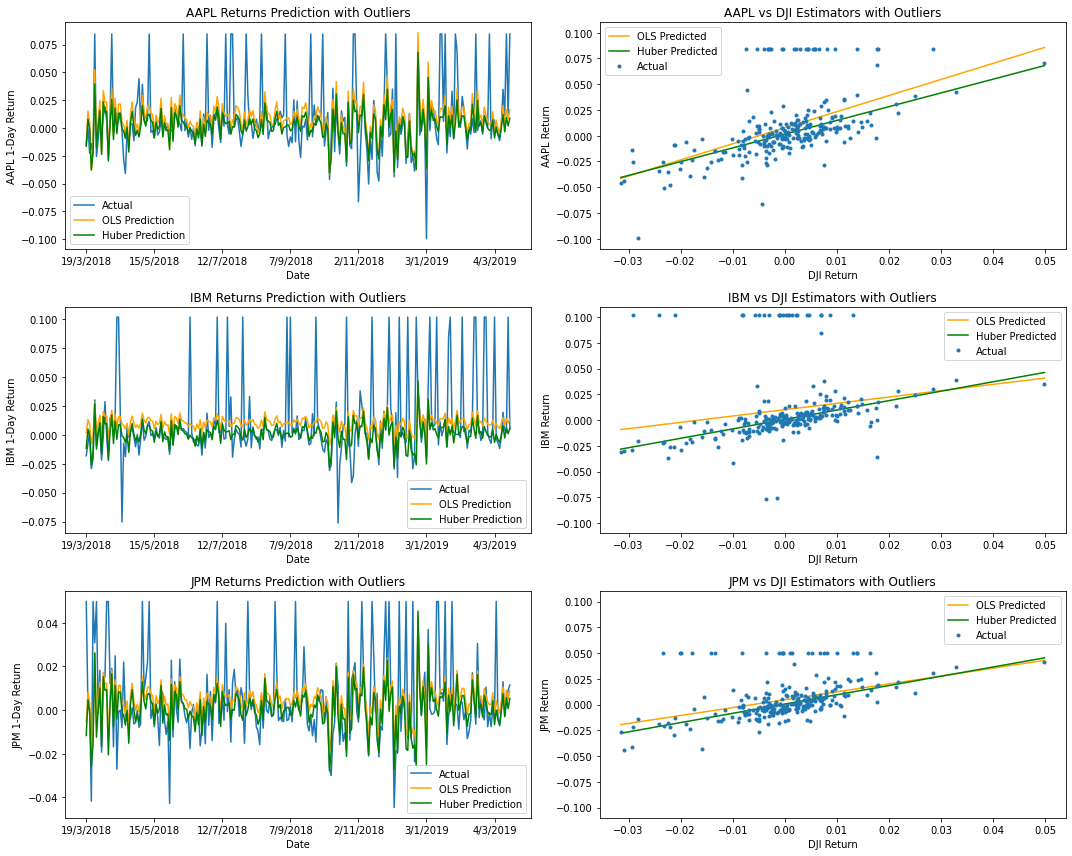

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

pc_outlier = 10

index_ret = DJI_data["Return"].values.reshape(-1,1)[1:]
x_axis = np.linspace(index_ret.min(), index_ret.max())

fig, axs = plt.subplots(3, 2, figsize = (15, 12)) 
loc = 0
for name, stock in total_stock_dict.items():
    outlier_val = np.max(stock["Return"]) * 1.2
    num_corr_vals = len(stock["Return"]) * pc_outlier // 100
    corrupt_ret_index = stock["Return"].sample(num_corr_vals)
    corrupt_ret_index.values[:] = outlier_val
    stock_ret = stock["Return"].copy()
    stock_ret.update(corrupt_ret_index)
    stock_ret = stock_ret.values.reshape(-1,1)[1:]

    ols = LinearRegression().fit(index_ret, stock_ret)
    hub = HuberRegressor().fit(index_ret, stock_ret.ravel())
    prediction_ols = ols.predict(index_ret)
    prediction_hub = hub.predict(index_ret)
    line_best_fit_ols = ols.coef_.squeeze() * x_axis + ols.intercept_.squeeze()
    line_best_fit_hub = hub.coef_.squeeze() * x_axis + hub.intercept_.squeeze()

    axs[loc][0].plot(DJI_data.index[1:], stock_ret, label = 'Actual')
    axs[loc][0].plot(DJI_data.index[1:], prediction_ols, label = 'OLS Prediction', color = 'orange')
    axs[loc][0].plot(DJI_data.index[1:], prediction_hub, label = 'Huber Prediction', color = 'green')
    axs[loc][0].set_title(f"{name} Returns Prediction with Outliers")
    axs[loc][0].set_xlabel("Date")
    axs[loc][0].set_xticks(DJI_data.index[1::40])
    axs[loc][0].set_ylabel(f"{name} 1-Day Return")
    axs[loc][0].legend()

    axs[loc][1].plot(x_axis, line_best_fit_ols, color = 'orange', label = 'OLS Predicted')
    axs[loc][1].plot(x_axis, line_best_fit_hub, color = 'green', label = 'Huber Predicted')
    axs[loc][1].plot(index_ret, stock_ret, '.', label = 'Actual')
    axs[loc][1].set_xlabel('DJI Return')
    axs[loc][1].set_ylabel(f'{name} Return')
    axs[loc][1].set_title(f'{name} vs DJI Estimators with Outliers')
    axs[loc][1].set_ylim(-0.11,0.11)
    axs[loc][1].legend()

    loc += 1

fig.tight_layout()

## 4.4

### 4.4.1

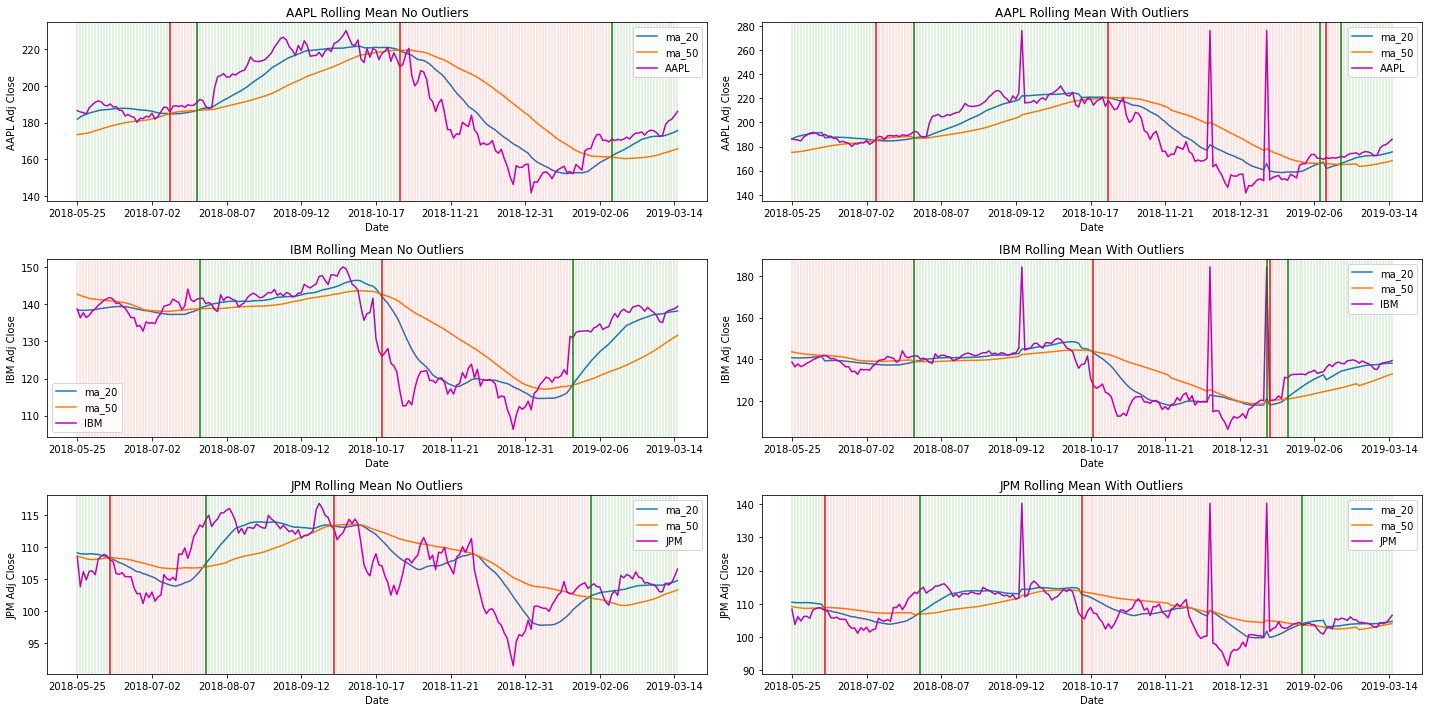

In [65]:
def gen_buy_sell_mean(series_data, name, loc, method):

    ma_50 = series_data.rolling(50).mean().dropna()
    ma_20 = series_data.rolling(20).mean()[ma_50.index]

    ma_20.plot(ax=loc, label="ma_20")
    ma_50.plot(ax=loc, label="ma_50")
    series_data[ma_50.index].plot(ax=loc, label=f"{name}", color='m')

    state = -1
    for i,day in enumerate(ma_50.index):
        if ma_20[day] > ma_50[day]:
            if state == "sell":
                loc.axvline(i, color='g')
            else:
                loc.axvline(i, color='g', alpha=0.15)
            state = "buy"
        else:
            if state == "buy":
                loc.axvline(i, color='r')
            else:
                loc.axvline(i, color='r', alpha=0.15)
            state = "sell"

    loc.set_ylabel(f"{name} Adj Close")
    loc.set_title(f"{name} {method}")
    loc.legend()

fig, axs = plt.subplots(3,2, figsize=(20,10))

loc = 0
for name, stock in total_stock_dict.items():
    gen_buy_sell_mean(stock["Adj Close"], name, axs[loc][0], "Rolling Mean No Outliers")
    loc += 1

loc = 0
for name, stock in total_stock_dict_modified.items():
    gen_buy_sell_mean(stock["Adj Close"], name, axs[loc][1], "Rolling Mean With Outliers")
    loc += 1

fig.tight_layout()


### 4.4.2

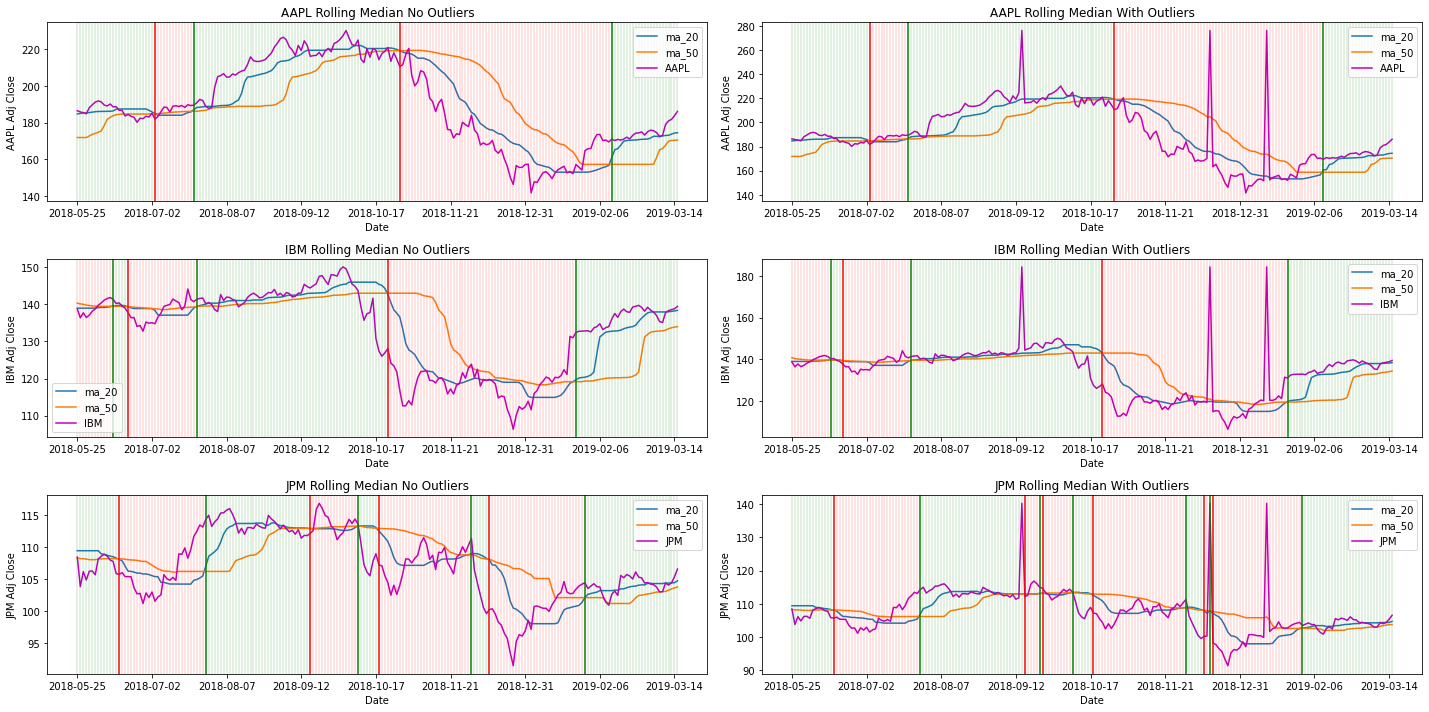

In [66]:
def gen_buy_sell_median(series_data, name, loc, method):

    ma_50 = series_data.rolling(50).median().dropna()
    ma_20 = series_data.rolling(20).median()[ma_50.index]

    ma_20.plot(ax=loc, label="ma_20")
    ma_50.plot(ax=loc, label="ma_50")
    series_data[ma_50.index].plot(ax=loc, label=f"{name}", color='m')

    state = -1
    for i,day in enumerate(ma_50.index):
        if ma_20[day] > ma_50[day]:
            if state == "sell":
                loc.axvline(i, color='g')
            else:
                loc.axvline(i, color='g', alpha=0.15)
            state = "buy"
        else:
            if state == "buy":
                loc.axvline(i, color='r')
            else:
                loc.axvline(i, color='r', alpha=0.15)
            state = "sell"

    loc.set_ylabel(f"{name} Adj Close")
    loc.set_title(f"{name} {method}")
    loc.legend()

fig, axs = plt.subplots(3,2, figsize=(20,10))

loc = 0
for name, stock in total_stock_dict.items():
    gen_buy_sell_median(stock["Adj Close"], name, axs[loc][0], "Rolling Median No Outliers")
    loc += 1

loc = 0
for name, stock in total_stock_dict_modified.items():
    gen_buy_sell_median(stock["Adj Close"], name, axs[loc][1], "Rolling Median With Outliers")
    loc += 1

fig.tight_layout()


# 5

## 5.A

### 5.A.1

In [67]:
stock_closing = pd.read_csv(r'snp_allstocks_2015_2019.csv') 
stock_closing = stock_closing.set_index('Date')

stock_closing_info = pd.read_csv(r'snp_info.csv') 
stock_closing_info.drop(columns=stock_closing_info.columns[0], inplace=True)

# 10 longest running securities in the financial sector

sector = "Financials"

first_10_founded = stock_closing_info.loc[stock_closing_info['GICS Sector']==sector][['Founded', 'Symbol']].dropna().sort_values('Founded')[:10]

stock_list = first_10_founded['Symbol']
reduced_stock_list = stock_closing[stock_list]


reduced_sec_data = stock_closing_info.loc[stock_closing_info['Symbol'].isin(stock_list)].set_index("Symbol")
display(reduced_sec_data[["GICS Sector", "GICS Sub Industry", "Headquarters Location", "Founded"]].sort_values('Founded'))




,GICS Sector,GICS Sub Industry,Headquarters Location,Founded
Symbol,,,,
AXP,Financials,Consumer Finance,"New York, New York",1850
MTB,Financials,Regional Banks,"Buffalo, New York",1856
FITB,Financials,Regional Banks,"Cincinnati, Ohio",1858
HBAN,Financials,Regional Banks,"Columbus, Ohio",1866
MET,Financials,Life & Health Insurance,"New York, New York",1868
NTRS,Financials,Asset Management & Custody Banks,"Chicago, Illinois",1889
AMP,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",1894
MCO,Financials,Financial Exchanges & Data,"New York, New York",1909
AIG,Financials,Property & Casualty Insurance,"New York, New York",1919


### 5.A.2

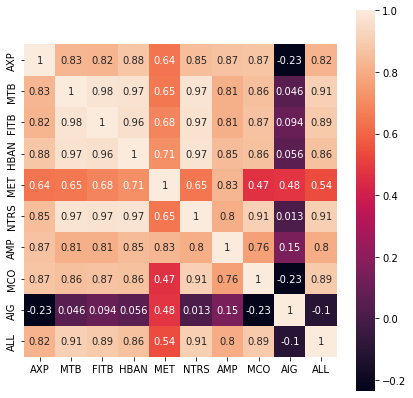

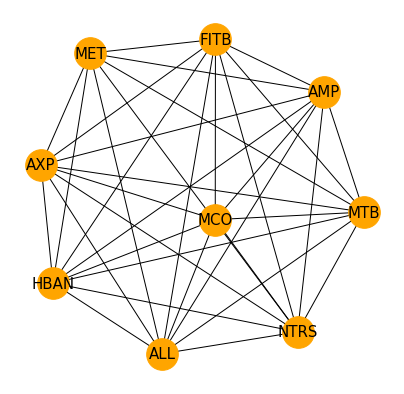

In [76]:
import networkx as nx

reduced_stock_list_log = np.log(reduced_stock_list)

stock_corr = reduced_stock_list_log.corr()

fig, axs = plt.subplots(figsize=(7,7))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(stock_corr.astype(float), axes=axs, square=True, annot=True)

network_links = stock_corr.stack().reset_index()
network_links.columns = ['var1', 'var2', 'value']

links_filtered = network_links.loc[(network_links['value'] > 0.5) & (network_links['var1'] != network_links['var2'])]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

fig2, axs2 = plt.subplots(figsize=(7,7))
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=1000, edge_color='black', linewidths=1, font_size=15, ax=axs2)


### 5.A.3

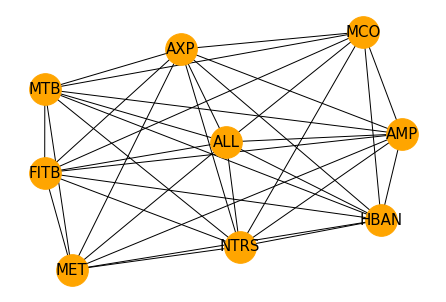

In [69]:
reduced_stock_list_log_shuffle = np.log(reduced_stock_list).sample(frac=1).reset_index(drop=True)

stock_corr = reduced_stock_list_log_shuffle.corr()

network_links = stock_corr.stack().reset_index()
network_links.columns = ['var1', 'var2', 'value']

links_filtered = network_links.loc[(network_links['value'] > 0.5) & (network_links['var1'] != network_links['var2'])]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=1000, edge_color='black', linewidths=1, font_size=15)

### 5.A.4

,AXP,MTB,FITB,HBAN,MET,NTRS,AMP,MCO,AIG,ALL
AXP,0.0,0.398106,0.462941,0.336925,0.524375,0.36726,0.348952,0.407797,0.86429,0.405567
MTB,0.398106,0.0,0.212978,0.16599,0.517009,0.159396,0.419405,0.427761,0.770431,0.283335
FITB,0.462941,0.212978,0.0,0.249411,0.616737,0.236392,0.478037,0.422663,0.872424,0.377748
HBAN,0.336925,0.16599,0.249411,0.0,0.478368,0.158091,0.374406,0.421766,0.761075,0.348987
MET,0.524375,0.517009,0.616737,0.478368,0.0,0.511502,0.414999,0.73665,0.403294,0.557456
NTRS,0.36726,0.159396,0.236392,0.158091,0.511502,0.0,0.420946,0.357926,0.772293,0.284842
AMP,0.348952,0.419405,0.478037,0.374406,0.414999,0.420946,0.0,0.539606,0.732473,0.423882
MCO,0.407797,0.427761,0.422663,0.421766,0.73665,0.357926,0.539606,0.0,1.0,0.383767
AIG,0.86429,0.770431,0.872424,0.761075,0.403294,0.772293,0.732473,1.0,0.0,0.804915
ALL,0.405567,0.283335,0.377748,0.348987,0.557456,0.284842,0.423882,0.383767,0.804915,0.0


<AxesSubplot:>

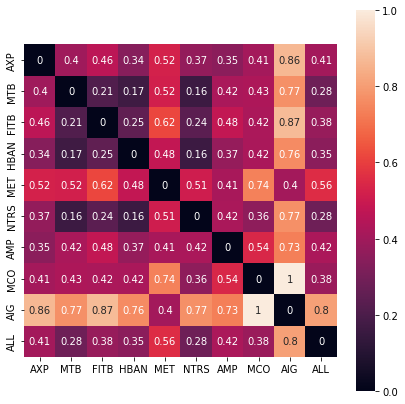

In [79]:
from numpy.fft import fft

def fourier_distance(s1: pd.Series, s2: pd.Series, bins=None):

    if bins is None:
        bins = math.floor(len(s1) / 2) + 1

    if len(s1) != len(s2):
        raise Exception("Series must have equal length") 

    fft1 = fft(s1)
    fft2 = fft(s2)

    series_sqr_diff = abs(fft1[1:bins] - fft2[1:bins]) ** 2

    return math.sqrt(series_sqr_diff.sum())



fourier_distance_mat = pd.DataFrame(columns=reduced_stock_list.columns, index=reduced_stock_list.columns)

for col in fourier_distance_mat:
    for row in fourier_distance_mat:
        s1 = reduced_stock_list_log[col]
        s2 = reduced_stock_list_log[row]
        fourier_distance_mat.at[col, row] = fourier_distance(s1,s2)

fourier_distance_mat_norm = fourier_distance_mat.div(fourier_distance_mat.max().max())

display(fourier_distance_mat_norm)

fig, axs = plt.subplots(figsize=(7,7))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(fourier_distance_mat_norm.astype(float), axes=axs, square=True, annot=True)

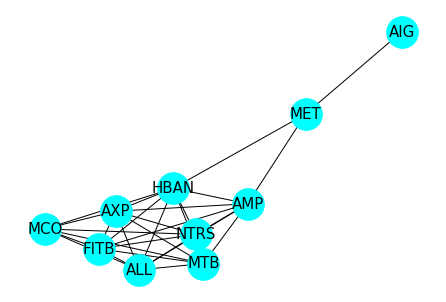

In [82]:
network_links = fourier_distance_mat_norm.stack().reset_index()
network_links.columns = ['var1', 'var2', 'value']

links_filtered = network_links.loc[(network_links['value'] < 0.5) & (network_links['var1'] != network_links['var2'])]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='cyan', node_size=1000, edge_color='black', linewidths=1, font_size=15)

### 5.A.5

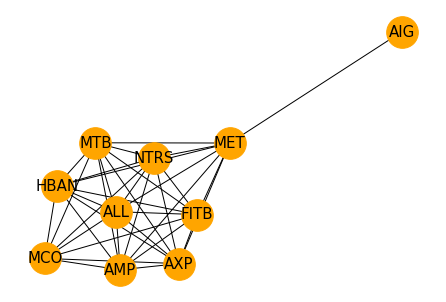

In [88]:
stock_corr_raw = reduced_stock_list.corr()


network_links = stock_corr_raw.stack().reset_index()
network_links.columns = ['var1', 'var2', 'value']

links_filtered = network_links.loc[(network_links['value'] > 0.5) & (network_links['var1'] != network_links['var2'])]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=1000, edge_color='black', linewidths=1, font_size=15)

<AxesSubplot:>

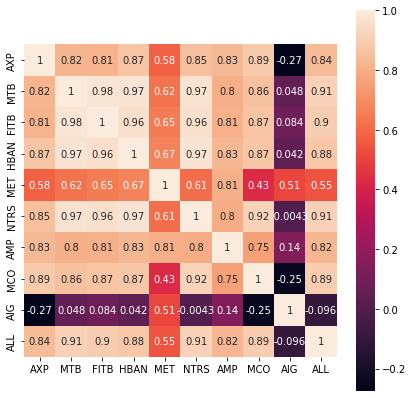

In [84]:
fig, axs = plt.subplots(figsize=(7,7))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(stock_corr_raw.astype(float), axes=axs, square=True, annot=True)

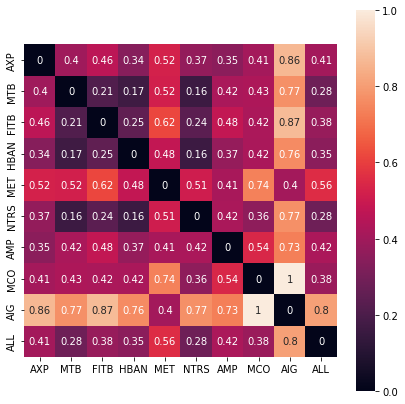

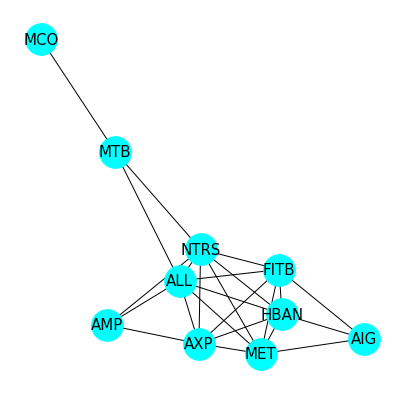

In [89]:
import seaborn as sns

fourier_distance_mat_raw = pd.DataFrame(columns=reduced_stock_list.columns, index=reduced_stock_list.columns)

for col in fourier_distance_mat_raw:
    for row in fourier_distance_mat_raw:
        s1 = reduced_stock_list[col]
        s2 = reduced_stock_list[row]
        fourier_distance_mat_raw.at[col, row] = fourier_distance(s1,s2)

fourier_distance_mat_raw_norm = fourier_distance_mat_raw.div(fourier_distance_mat_raw.max().max())

fig, axs = plt.subplots(figsize=(7,7))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(fourier_distance_mat_norm.astype(float), axes=axs, square=True, annot=True)

network_links = fourier_distance_mat_raw_norm.stack().reset_index()
network_links.columns = ['var1', 'var2', 'value']

links_filtered = network_links.loc[(network_links['value'] < 0.5) & (network_links['var1'] != network_links['var2'])]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

fig2, axs2 = plt.subplots(figsize=(7,7))
# Plot the network:
nx.draw(G, with_labels=True, node_color='cyan', node_size=1000, edge_color='black', linewidths=1, font_size=15, ax=axs2)